In [3]:
import requests
import urllib
from bs4 import BeautifulSoup
import random
import time
from tqdm import tqdm_notebook as tqdm
import re
import unicodedata
import collections
import re
import string
import json
import pandas as pd
import numpy as np

import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import seaborn as sns

from pymystem3 import Mystem
mystem = Mystem()

SEED=1337

import matplotlib.pylab as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split as train
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('/Users/alinashaymardanova/Desktop/data/result.csv', sep='\t', encoding='utf-8')

In [12]:
df

,Author,Poem,Adj_semantic_density_cos,Adj_semantic_density_eucl,Adj_semantic_density_dot,Semantic_density_cos,Semantic_density_eucl,Semantic_density_dot,Frequency word,Stanzas_dot,Stanzas_eucl,Stanzas_cos,Bigramms_without_spaces,ThreeGrams_without_spaces,Bigramms_with_spaces,ThreeGrams_with_spaces,Len
0,Computer,"Он был похож на скрежет тормозов,\nОна синюшны...",5.942419e-01,20.420713,0.405758,0.883234,35.879446,0.116766,1.0,5.057240e-01,10.195531,0.494276,0.046154,0.032787,0.050633,0.032258,20
1,Computer,"Задрав вершины милые штрихи,\nОтрыв седой равн...",5.674633e-01,22.646386,0.432537,0.877236,33.235625,0.122764,1.0,5.057240e-01,10.195531,0.494276,0.043478,0.044776,0.056818,0.028571,17
2,Computer,"Дренажных сверстников сбивая,\nНога юлила меж ...",7.484377e-01,23.293593,0.251562,0.903880,31.773463,0.096120,2.0,5.057240e-01,10.195531,0.494276,0.107527,0.069307,0.087719,0.064516,28
3,Computer,Краснощёкий кучер подбоченясь\nСрезал курящих ...,6.324285e-01,15.204069,0.367572,0.880547,28.207399,0.119453,1.0,5.057240e-01,10.195531,0.494276,0.058824,0.031746,0.048780,0.021053,16
4,Computer,Импозантные сосульки\nразукрасили брикеты\nСоч...,7.487603e-01,24.449864,0.251240,0.872494,30.420635,0.127506,2.0,5.057240e-01,10.195531,0.494276,0.063158,0.028571,0.072072,0.039735,25
5,Computer,Ах! Горький шелест\nРасставлен часовой\nОткрыт...,6.529832e-01,24.000703,0.347017,0.812225,32.364441,0.187775,1.0,5.057240e-01,10.195531,0.494276,0.051282,0.058824,0.076923,0.035088,9
6,Computer,Липкий плен завлекал примадонну\nВ паху устало...,6.161216e-01,21.771420,0.383878,0.866264,34.505504,0.133736,1.0,5.057240e-01,10.195531,0.494276,0.068966,0.051724,0.057143,0.044444,19
7,Computer,"Откинул лодочкой фригидность\nБеснуйся, ловкая...",6.953989e-01,22.402400,0.304601,0.884599,28.821775,0.115401,1.0,5.057240e-01,10.195531,0.494276,0.068966,0.033333,0.057971,0.035294,12
8,Computer,Татальный ритм сметает нимб\nОстывший телом тр...,3.439341e-01,16.469299,0.656066,0.798503,30.650813,0.201497,1.0,5.057240e-01,10.195531,0.494276,0.072727,0.037037,0.055556,0.044944,18
9,Computer,"Скрытый ветер несёт крышей сохнущей память,\nВ...",7.313932e-01,22.754881,0.268607,0.872842,32.837319,0.127158,1.0,5.057240e-01,10.195531,0.494276,0.102564,0.038462,0.082474,0.048780,22


In [129]:
del df['Unnamed: 0']
# del df['Unnamed: 0.1']
# del df['Unnamed: 0.1.1']
del df['Poem']

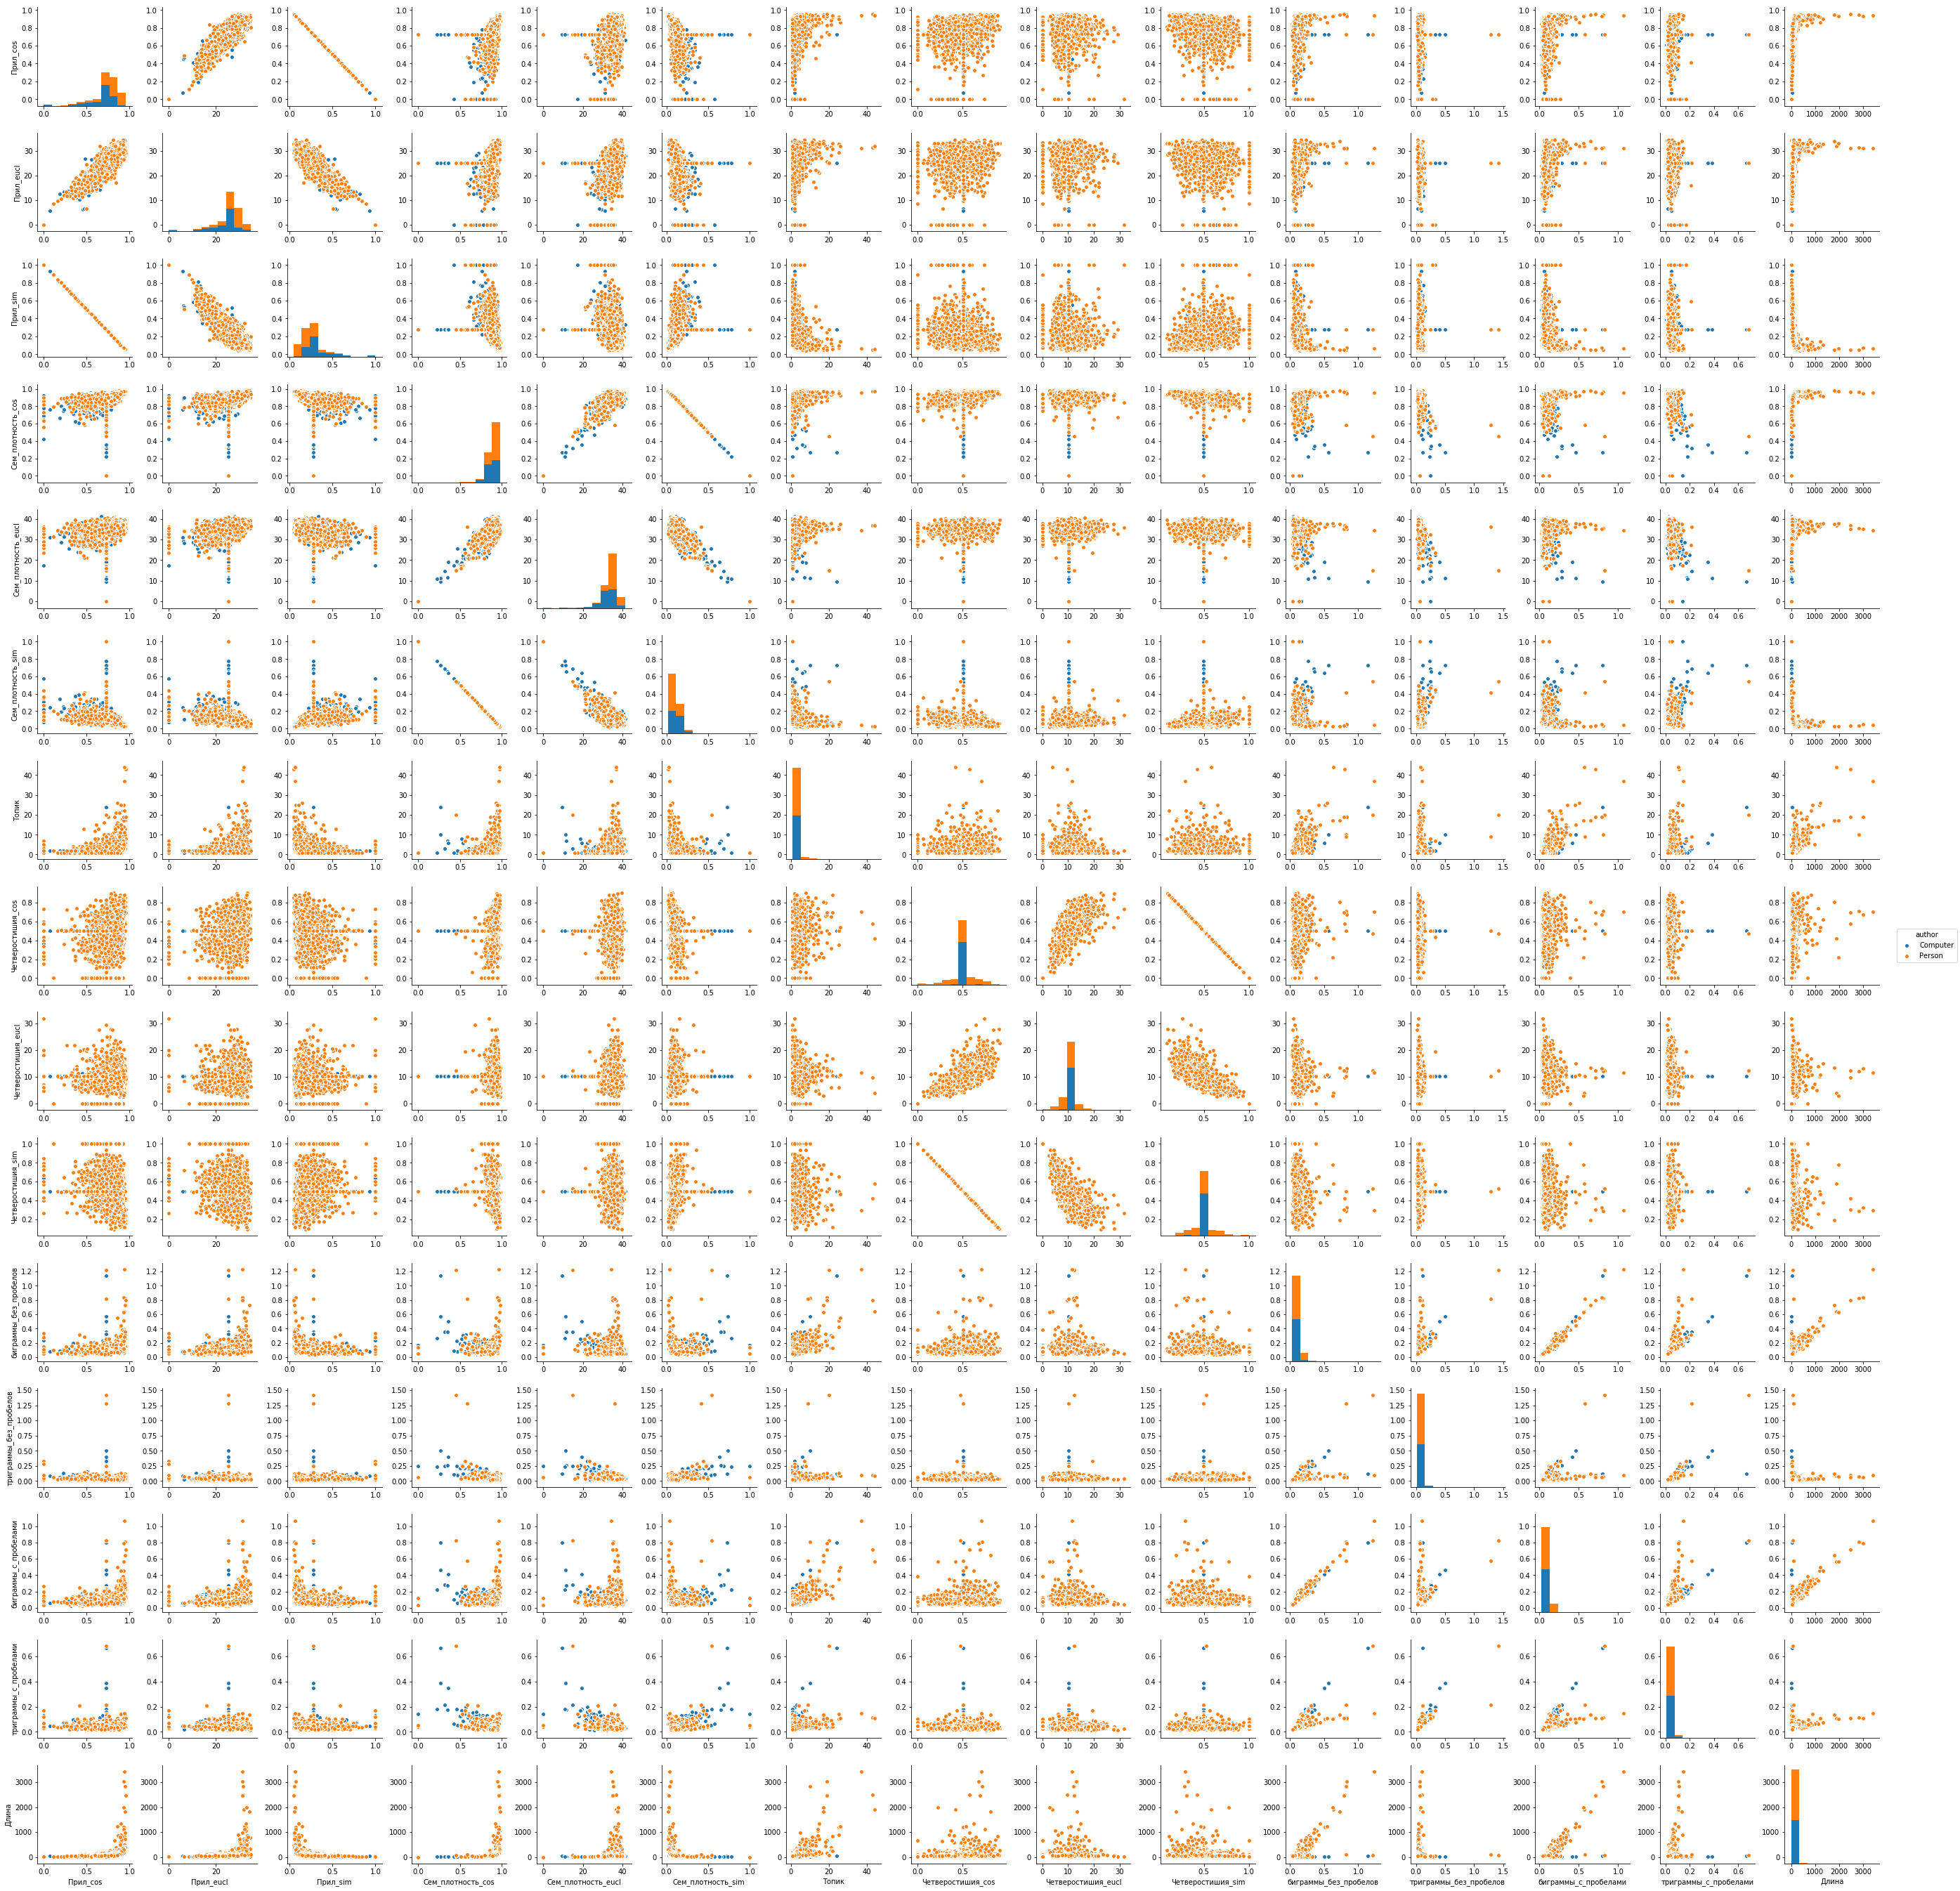

In [9]:
cols = ['author', 'Прил_cos', 'Прил_eucl', 'Прил_sim',
       'Сем_плотность_cos', 'Сем_плотность_eucl', 'Сем_плотность_sim', 'Топик',
       'Четверостишия_cos', 'Четверостишия_eucl', 'Четверостишия_sim',
       'биграммы_без_пробелов', 'триграммы_без_пробелов',
       'биграммы_с_пробелами', 'триграммы_с_пробелами', 'Длина']

                                     
sns_plot = sns.pairplot(df[cols], hue='author')

In [ ]:
sns_plot.savefig("/Users/alinashaymardanova/Desktop/feature.png")

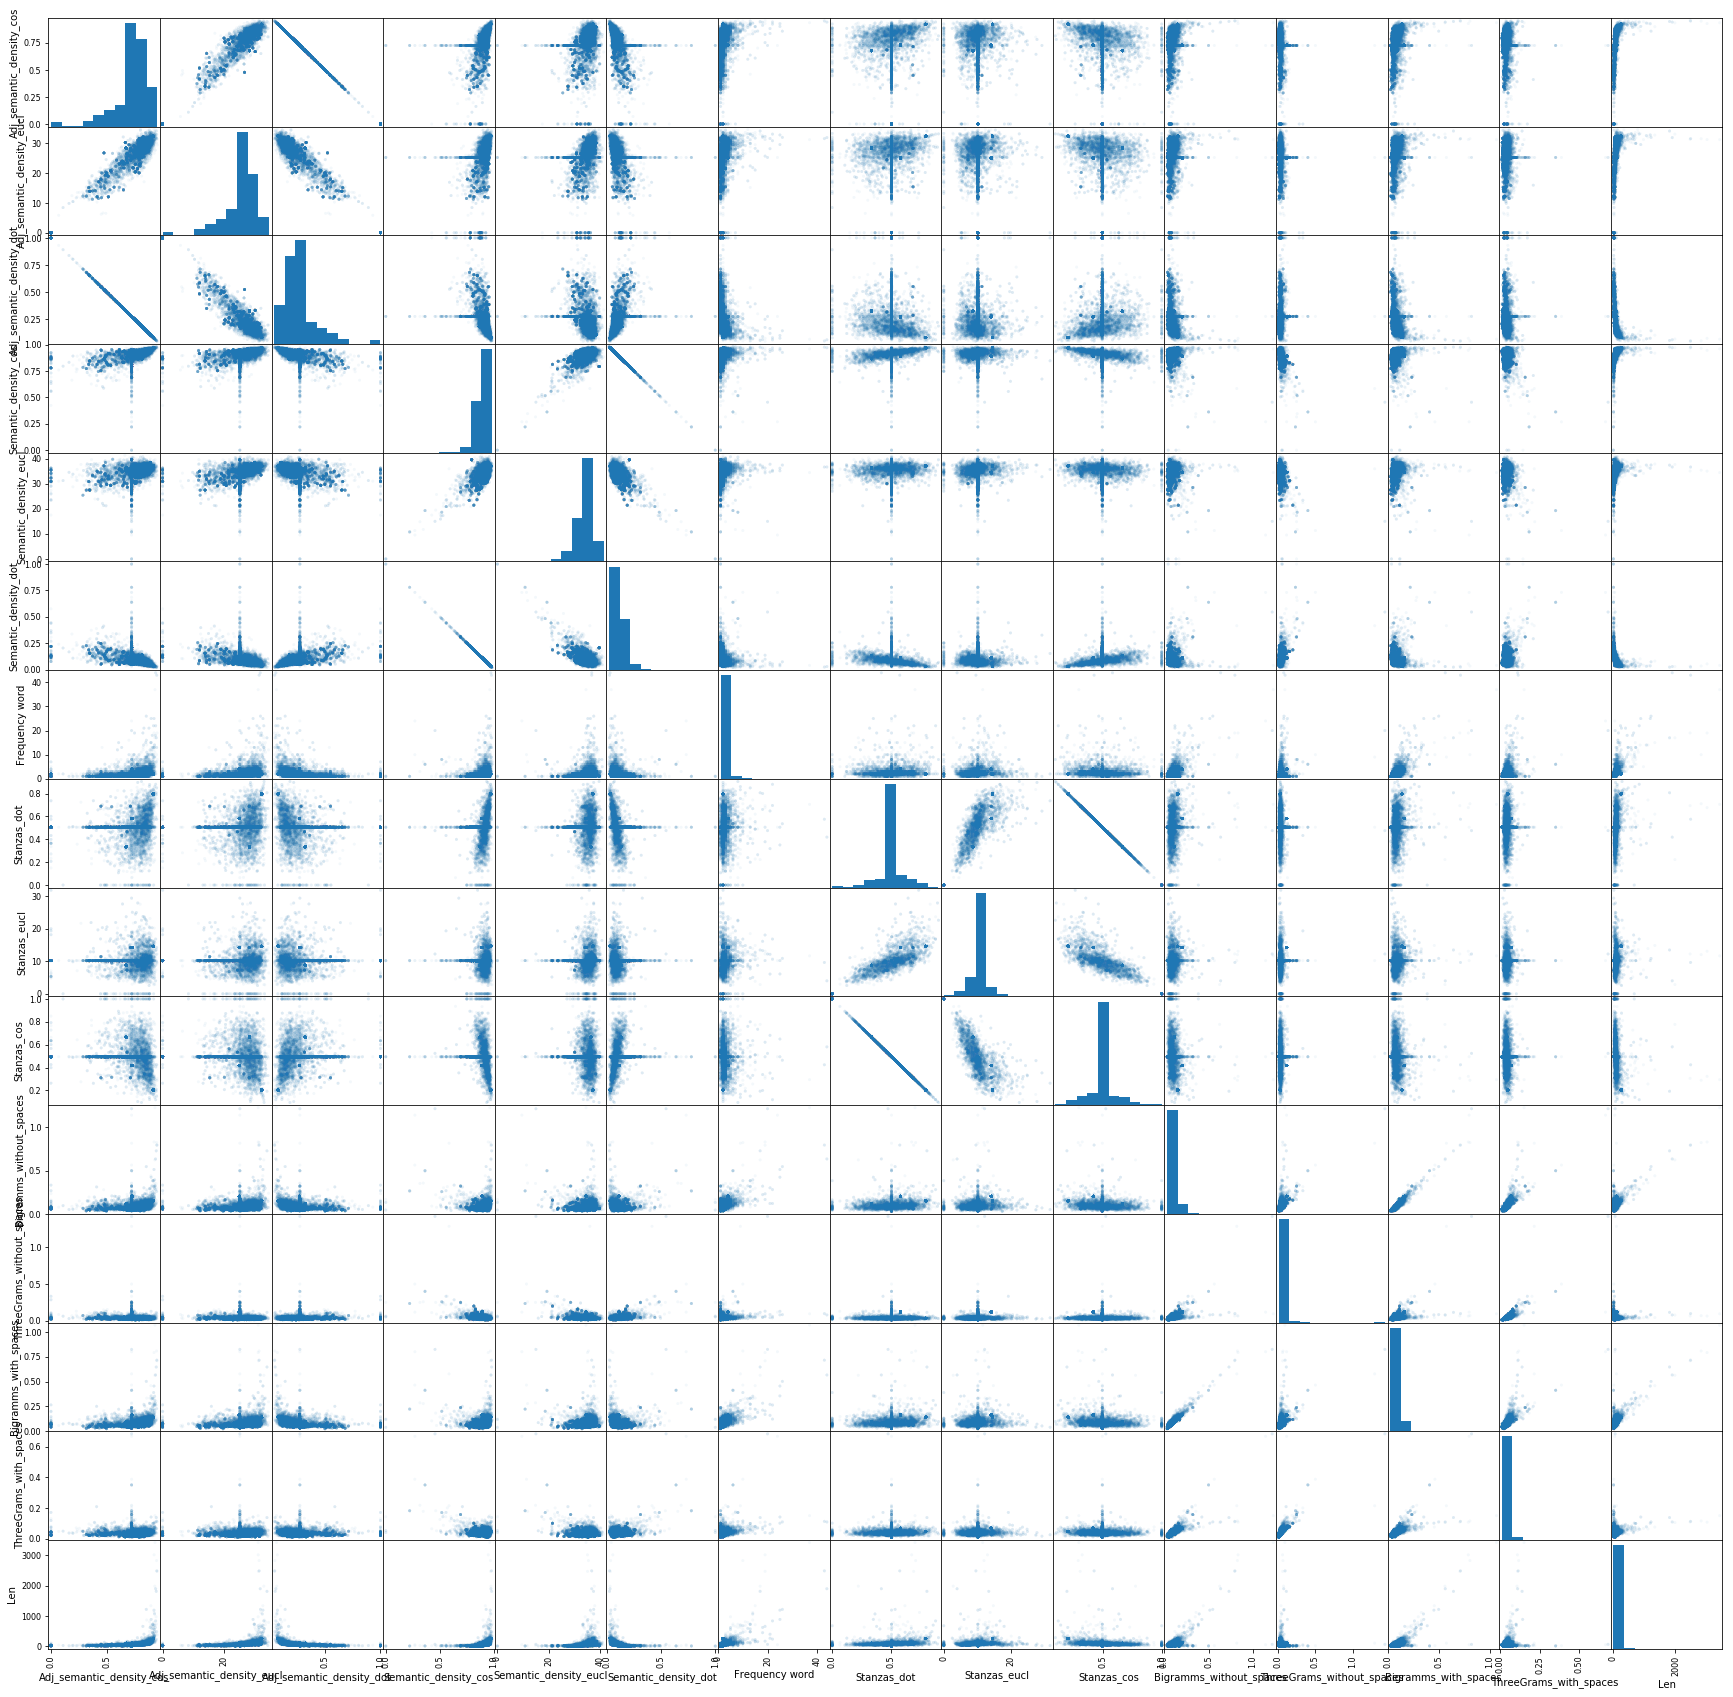

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_plot = scatter_matrix(df, alpha=0.05, figsize=(30,30))

In [15]:
df.corr()

,Adj_semantic_density_cos,Adj_semantic_density_eucl,Adj_semantic_density_dot,Semantic_density_cos,Semantic_density_eucl,Semantic_density_dot,Frequency word,Stanzas_dot,Stanzas_eucl,Stanzas_cos,Bigramms_without_spaces,ThreeGrams_without_spaces,Bigramms_with_spaces,ThreeGrams_with_spaces,Len
Adj_semantic_density_cos,1.000000,0.902418,-1.000000,0.410709,0.305398,-0.410709,0.240929,0.155437,0.048348,-0.155437,0.184354,-0.089474,0.235097,0.027933,0.333017
Adj_semantic_density_eucl,0.902418,1.000000,-0.902418,0.354493,0.356446,-0.354493,0.222122,0.115009,0.052239,-0.115009,0.182834,-0.075623,0.227825,0.040486,0.317770
Adj_semantic_density_dot,-1.000000,-0.902418,1.000000,-0.410709,-0.305398,0.410709,-0.240929,-0.155437,-0.048348,0.155437,-0.184354,0.089474,-0.235097,-0.027933,-0.333017
Semantic_density_cos,0.410709,0.354493,-0.410709,1.000000,0.638792,-1.000000,0.142685,0.213577,0.048817,-0.213577,-0.097610,-0.454115,-0.008496,-0.340519,0.296966
Semantic_density_eucl,0.305398,0.356446,-0.305398,0.638792,1.000000,-0.638792,0.198351,0.056083,0.060827,-0.056083,0.029880,-0.300074,0.111563,-0.173971,0.286510
Semantic_density_dot,-0.410709,-0.354493,0.410709,-1.000000,-0.638792,1.000000,-0.142685,-0.213577,-0.048817,0.213577,0.097610,0.454115,0.008496,0.340519,-0.296966
Frequency word,0.240929,0.222122,-0.240929,0.142685,0.198351,-0.142685,1.000000,0.056003,0.061385,-0.056003,0.632692,0.205476,0.691625,0.383288,0.715483
Stanzas_dot,0.155437,0.115009,-0.155437,0.213577,0.056083,-0.213577,0.056003,1.000000,0.761791,-1.000000,0.133866,0.006744,0.143134,0.046776,0.187398
Stanzas_eucl,0.048348,0.052239,-0.048348,0.048817,0.060827,-0.048817,0.061385,0.761791,1.000000,-0.761791,0.111991,0.068442,0.114677,0.062579,0.099996
Stanzas_cos,-0.155437,-0.115009,0.155437,-0.213577,-0.056083,0.213577,-0.056003,-1.000000,-0.761791,1.000000,-0.133866,-0.006744,-0.143134,-0.046776,-0.187398


In [22]:
df.describe()

,Adj_semantic_density_cos,Adj_semantic_density_eucl,Adj_semantic_density_dot,Semantic_density_cos,Semantic_density_eucl,Semantic_density_dot,Frequency word,Stanzas_dot,Stanzas_eucl,Stanzas_cos,Bigramms_without_spaces,ThreeGrams_without_spaces,Bigramms_with_spaces,ThreeGrams_with_spaces,Len
count,1.361300e+04,13613.000000,13613.000000,1.361300e+04,13613.000000,13613.000000,13613.000000,1.361300e+04,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000
mean,7.254596e-01,25.236259,0.274540,8.918973e-01,33.954869,0.108103,2.170646,5.057240e-01,10.195531,0.494276,0.090038,0.041332,0.080800,0.036704,68.232131
std,1.551693e-01,5.445435,0.155169,6.703673e-02,3.351199,0.067037,2.082641,1.093089e-01,2.440140,0.109309,0.054876,0.037881,0.046191,0.023400,104.589017
min,-1.426820e-07,0.000000,0.043370,4.004517e-09,0.000000,0.018624,1.000000,-1.303434e-07,0.000000,0.094062,0.031746,0.011494,0.025316,0.008264,2.000000
25%,6.940165e-01,23.993622,0.177287,8.643753e-01,32.436978,0.062679,1.000000,5.057240e-01,10.195531,0.494276,0.058824,0.024390,0.053659,0.023438,19.000000
50%,7.388954e-01,25.521700,0.261105,9.090517e-01,34.628945,0.090948,2.000000,5.057240e-01,10.195531,0.494276,0.075472,0.033333,0.068966,0.031250,49.000000
75%,8.227133e-01,28.562216,0.305984,9.373214e-01,36.192289,0.135625,2.000000,5.057240e-01,10.195531,0.494276,0.108434,0.044776,0.094444,0.044355,87.000000
max,9.566301e-01,34.721256,1.000000,9.813757e-01,41.330508,1.000000,44.000000,9.059382e-01,31.818101,1.000000,1.229376,1.421053,1.068182,0.682927,3423.000000


In [32]:
df

,Author,Adj_semantic_density_cos,Adj_semantic_density_eucl,Adj_semantic_density_dot,Semantic_density_cos,Semantic_density_eucl,Semantic_density_dot,Frequency word,Stanzas_dot,Stanzas_eucl,Stanzas_cos,Bigramms_without_spaces,ThreeGrams_without_spaces,Bigramms_with_spaces,ThreeGrams_with_spaces,Len
0,Computer,5.942419e-01,20.420713,0.405758,0.883234,35.879446,0.116766,1.0,5.057240e-01,10.195531,0.494276,0.046154,0.032787,0.050633,0.032258,20
1,Computer,5.674633e-01,22.646386,0.432537,0.877236,33.235625,0.122764,1.0,5.057240e-01,10.195531,0.494276,0.043478,0.044776,0.056818,0.028571,17
2,Computer,7.484377e-01,23.293593,0.251562,0.903880,31.773463,0.096120,2.0,5.057240e-01,10.195531,0.494276,0.107527,0.069307,0.087719,0.064516,28
3,Computer,6.324285e-01,15.204069,0.367572,0.880547,28.207399,0.119453,1.0,5.057240e-01,10.195531,0.494276,0.058824,0.031746,0.048780,0.021053,16
4,Computer,7.487603e-01,24.449864,0.251240,0.872494,30.420635,0.127506,2.0,5.057240e-01,10.195531,0.494276,0.063158,0.028571,0.072072,0.039735,25
5,Computer,6.529832e-01,24.000703,0.347017,0.812225,32.364441,0.187775,1.0,5.057240e-01,10.195531,0.494276,0.051282,0.058824,0.076923,0.035088,9
6,Computer,6.161216e-01,21.771420,0.383878,0.866264,34.505504,0.133736,1.0,5.057240e-01,10.195531,0.494276,0.068966,0.051724,0.057143,0.044444,19
7,Computer,6.953989e-01,22.402400,0.304601,0.884599,28.821775,0.115401,1.0,5.057240e-01,10.195531,0.494276,0.068966,0.033333,0.057971,0.035294,12
8,Computer,3.439341e-01,16.469299,0.656066,0.798503,30.650813,0.201497,1.0,5.057240e-01,10.195531,0.494276,0.072727,0.037037,0.055556,0.044944,18
9,Computer,7.313932e-01,22.754881,0.268607,0.872842,32.837319,0.127158,1.0,5.057240e-01,10.195531,0.494276,0.102564,0.038462,0.082474,0.048780,22


In [130]:
X = df.drop(('Author'), axis=1)
y = df['Author']
feature_names = X.columns

In [131]:
print(X.shape)
print(y.shape)

(13613, 15)
(13613,)


In [55]:
df.iloc[:, 2:].head()

,Adj_semantic_density_eucl,Adj_semantic_density_dot,Semantic_density_cos,Semantic_density_eucl,Semantic_density_dot,Frequency word,Stanzas_dot,Stanzas_eucl,Stanzas_cos,Bigramms_without_spaces,ThreeGrams_without_spaces,Bigramms_with_spaces,ThreeGrams_with_spaces
0,20.420713,0.405758,0.883234,35.879446,0.116766,1.0,0.505724,10.195531,0.494276,0.046154,0.032787,0.050633,0.032258
1,22.646386,0.432537,0.877236,33.235625,0.122764,1.0,0.505724,10.195531,0.494276,0.043478,0.044776,0.056818,0.028571
2,23.293593,0.251562,0.903880,31.773463,0.096120,2.0,0.505724,10.195531,0.494276,0.107527,0.069307,0.087719,0.064516
3,15.204069,0.367572,0.880547,28.207399,0.119453,1.0,0.505724,10.195531,0.494276,0.058824,0.031746,0.048780,0.021053
4,24.449864,0.251240,0.872494,30.420635,0.127506,2.0,0.505724,10.195531,0.494276,0.063158,0.028571,0.072072,0.039735


In [132]:
X_train, X_test, y_train, y_test = train(X, y, test_size=0.6, random_state = 11)

In [122]:
rf = RandomForestClassifier(
    random_state=SEED,
    max_depth=100,
    n_estimators=500,
    class_weight='balanced'
)

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=100, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

**Со всеми признаками**

In [41]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

train 1.0
test 0.9827472958009569


In [42]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'Len  ' (0.2414)
 2. feature 'Frequency word' (0.0945)
 3. feature 'Bigramms_without_spaces' (0.0781)
 4. feature 'Bigramms_with_spaces' (0.0743)
 5. feature 'ThreeGrams_with_spaces' (0.0711)
 6. feature 'Stanzas_eucl' (0.0701)
 7. feature 'Stanzas_cos' (0.0598)
 8. feature 'Stanzas_dot' (0.0536)
 9. feature 'Semantic_density_eucl' (0.0522)
10. feature 'Semantic_density_cos' (0.0426)
11. feature 'Semantic_density_dot' (0.0408)
12. feature 'ThreeGrams_without_spaces' (0.0349)
13. feature 'Adj_semantic_density_eucl' (0.0303)
14. feature 'Adj_semantic_density_cos' (0.0295)
15. feature 'Adj_semantic_density_dot' (0.0268)


**Длина в словах действительно стала решающим признаком**

Ошибка на тестовой выборке составила 1,7%

In [43]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.017140058765915768


Лучшие признаки

In [160]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['Длина', 'Топик', 'биграммы_без_пробелов', 'биграммы_с_пробелами',
       'триграммы_с_пробелами', 'Четверостишия_eucl', 'Четверостишия_sim',
       'Четверостишия_cos'],
      dtype='object')


**Минус длина**

In [109]:
del df['Len']

In [64]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

train 1.0
test 0.9802857456624658
Feature importances:
 1. feature 'Frequency word' (0.1249)
 2. feature 'Bigramms_without_spaces' (0.1092)
 3. feature 'Bigramms_with_spaces' (0.1054)
 4. feature 'Stanzas_eucl' (0.0885)
 5. feature 'ThreeGrams_with_spaces' (0.0871)
 6. feature 'Semantic_density_eucl' (0.0745)
 7. feature 'Stanzas_cos' (0.0738)
 8. feature 'Stanzas_dot' (0.0666)
 9. feature 'Semantic_density_cos' (0.0494)
10. feature 'Semantic_density_dot' (0.0486)
11. feature 'Adj_semantic_density_dot' (0.0460)
12. feature 'ThreeGrams_without_spaces' (0.0430)
13. feature 'Adj_semantic_density_cos' (0.0418)
14. feature 'Adj_semantic_density_eucl' (0.0412)


**Минус длина и "топик"**

In [70]:
del df['Frequency word']

In [75]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

train 1.0
test 0.9800393174832466
Feature importances:
 1. feature 'Bigramms_with_spaces' (0.1306)
 2. feature 'Bigramms_without_spaces' (0.1182)
 3. feature 'Stanzas_eucl' (0.0977)
 4. feature 'ThreeGrams_with_spaces' (0.0936)
 5. feature 'Stanzas_cos' (0.0907)
 6. feature 'Semantic_density_eucl' (0.0856)
 7. feature 'Stanzas_dot' (0.0818)
 8. feature 'Adj_semantic_density_dot' (0.0538)
 9. feature 'Adj_semantic_density_eucl' (0.0535)
10. feature 'Semantic_density_dot' (0.0518)
11. feature 'Semantic_density_cos' (0.0507)
12. feature 'Adj_semantic_density_cos' (0.0492)
13. feature 'ThreeGrams_without_spaces' (0.0428)


**Минус длина, топик, биграммы с пробелами**

In [119]:
del df['Bigramms_with_spaces']

In [81]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

train 1.0
test 0.9800385309622597
Feature importances:
 1. feature 'Bigramms_without_spaces' (0.1552)
 2. feature 'ThreeGrams_with_spaces' (0.1281)
 3. feature 'Stanzas_eucl' (0.1029)
 4. feature 'Semantic_density_eucl' (0.0969)
 5. feature 'Stanzas_cos' (0.0871)
 6. feature 'Stanzas_dot' (0.0836)
 7. feature 'Adj_semantic_density_dot' (0.0686)
 8. feature 'Adj_semantic_density_cos' (0.0628)
 9. feature 'Adj_semantic_density_eucl' (0.0624)
10. feature 'Semantic_density_cos' (0.0526)
11. feature 'Semantic_density_dot' (0.0511)
12. feature 'ThreeGrams_without_spaces' (0.0487)


**Минус длина, топик, биграммы с пробелами, биграммы без пробелов**

In [117]:
del df['Bigramms_without_spaces']

In [87]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

train 1.0
test 0.9783210595869256
Feature importances:
 1. feature 'ThreeGrams_with_spaces' (0.1746)
 2. feature 'Stanzas_eucl' (0.1255)
 3. feature 'Semantic_density_eucl' (0.1145)
 4. feature 'Stanzas_cos' (0.1008)
 5. feature 'Stanzas_dot' (0.0928)
 6. feature 'Adj_semantic_density_dot' (0.0771)
 7. feature 'Adj_semantic_density_cos' (0.0735)
 8. feature 'ThreeGrams_without_spaces' (0.0655)
 9. feature 'Adj_semantic_density_eucl' (0.0632)
10. feature 'Semantic_density_cos' (0.0571)
11. feature 'Semantic_density_dot' (0.0555)


**Минус длина, топик, биграммы с пробелами, биграммы без пробелов, четверостишия**

In [89]:
del df['Stanzas_cos']
del df['Stanzas_eucl']
del df['Stanzas_dot']

In [94]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

train 1.0
test 0.9758433144716614
Feature importances:
 1. feature 'ThreeGrams_with_spaces' (0.2324)
 2. feature 'Semantic_density_eucl' (0.1581)
 3. feature 'Adj_semantic_density_dot' (0.1124)
 4. feature 'Adj_semantic_density_cos' (0.1064)
 5. feature 'Adj_semantic_density_eucl' (0.1055)
 6. feature 'ThreeGrams_without_spaces' (0.1039)
 7. feature 'Semantic_density_dot' (0.0910)
 8. feature 'Semantic_density_cos' (0.0903)


**Минус только четверостишия и длина**

In [103]:
del df['Stanzas_cos']
del df['Stanzas_eucl']
del df['Stanzas_dot']

In [114]:
print('train', metrics.f1_score(y_train, rf.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, rf.predict(X_test), average='macro'))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

train 1.0
test 0.9769492899500396
Feature importances:
 1. feature 'Frequency word' (0.1605)
 2. feature 'Bigramms_without_spaces' (0.1322)
 3. feature 'ThreeGrams_with_spaces' (0.1165)
 4. feature 'Bigramms_with_spaces' (0.1143)
 5. feature 'Semantic_density_eucl' (0.0985)
 6. feature 'Semantic_density_dot' (0.0734)
 7. feature 'Semantic_density_cos' (0.0705)
 8. feature 'Adj_semantic_density_dot' (0.0614)
 9. feature 'ThreeGrams_without_spaces' (0.0588)
10. feature 'Adj_semantic_density_cos' (0.0570)
11. feature 'Adj_semantic_density_eucl' (0.0568)


---

KNN – метод ближайших соседей

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pylab as plt
%matplotlib inline

In [147]:
def knn_(cv, X_train, y_train):
    knn = KNeighborsClassifier()
    neighbors = {'n_neighbors': list(range(1, 100))}
    grid = GridSearchCV(knn, param_grid=neighbors, cv=cv, scoring='accuracy')
    grid.fit(X_train, y_train)
    return grid


def prep_visual(grid):
    means = []
    stds = []
    for elem in grid.grid_scores_:
        means.append(np.mean(elem.cv_validation_scores))
        stds.append(np.sqrt(np.var(elem.cv_validation_scores)))

    means = np.array(means)
    stds = np.array(stds)
    return means, stds


def visual(means, stds):
    plt.figure(figsize=(18, 8))
    plt.plot(range(1, 100), means)
    plt.fill_between(range(len(means)), means + stds, means-stds, alpha=0.2, facecolor='blue')
    plt.xlim(1, 100)
    plt.ylim(np.min(means - stds) - 0.1, 1)
    plt.xticks(np.arange(1, 100, 2))
    plt.xlabel('Number of nearest neighbours')
    plt.ylabel('Accuracy score')
    plt.show()

График зависимости метрики accuracy от параметра n_neighbors, а также ее  1σ−доверительный интервал

/Users/alinashaymardanova/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


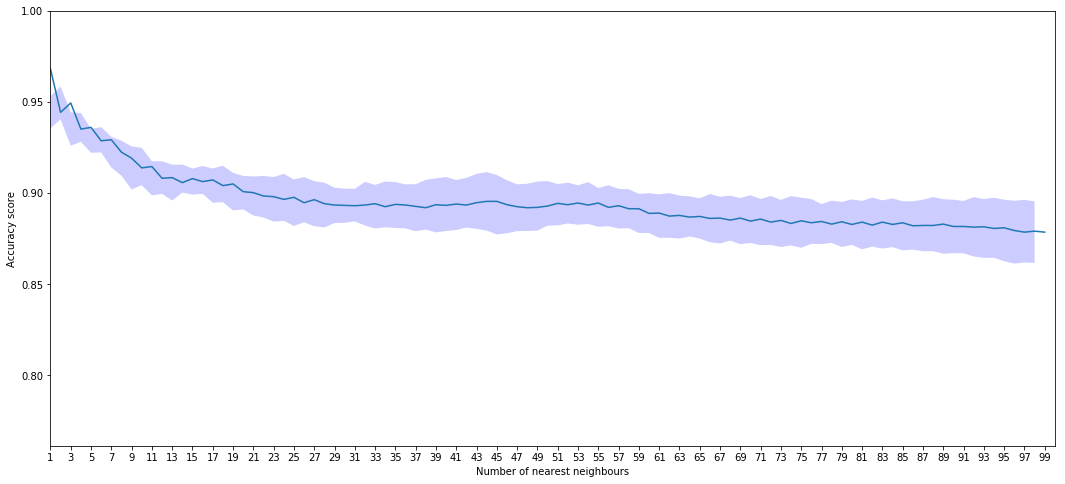

In [161]:
cv = 5
grid5 = knn_(cv, X_train, y_train)
means5, stds5 = prep_visual(grid5)
visual(means5, stds5)

Можем предсказывать значение целевого признака по входным признакам для новых объектов.
Нас интересует качество построенной модели, поэтому будем предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [163]:
y_train_predict = grid5.predict(X_train)
y_test_predict = grid5.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.0 0.03023996082272282


err_train и err_test – это ошибки на обучающей и тестовой выборках. Как мы видим, они составили 0% и 3%.

In [166]:
print('train', metrics.f1_score(y_train, grid5.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, grid5.predict(X_test), average='macro'))

train 1.0
test 0.9696177367592065


In [167]:
grid5.best_params_

{'n_neighbors': 1}

---

In [147]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV

model = Pipeline([
    ('enc', OneHotEncoder()),
    ('est', LogisticRegressionCV(Cs=5, cv=5, n_jobs=-1, scoring='f1_macro', 
                             penalty='l2', solver='newton-cg', multi_class='multinomial', random_state=SEED)),
])

model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('enc', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)), ('est', LogisticRegressionCV(Cs=5, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=-1, penalty='l2',
           random_state=1337, refit=True, scoring='f1_macro',
           solver='newton-cg', tol=0.0001, verbose=0))])

In [148]:
model.score(X_train, y_train)

0.5360881542699725

In [150]:
# model.score(X_test, y_test)

In [153]:
print('train', metrics.f1_score(y_train, model.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, model.predict(X_test), average='macro'))

train 0.34899569583931134


ValueError: unknown categorical feature present [  31 3017   31   31   44 2827   44   41    1 3423   44] during transform.

---

In [154]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [155]:
def dtc_(cv, X_train, y_train):
    p = {'max_depth': range(1, 100)}
    neigh = DecisionTreeClassifier(random_state=0)
    grid = GridSearchCV(neigh, p, cv=cv, scoring='roc_auc')
    grid.fit(X_train, y_train)
    return grid

def visual(means, stds):
    plt.figure(figsize=(20, 6))
    plt.style.use('ggplot')
    plt.plot(range(1, 100), means)
    plt.fill_between(range(len(means)), means + stds, means-stds, alpha=0.2, facecolor='blue')
    #plt.xticks(np.arange(1, 100, 2))
    plt.xlabel('Max depth')
    plt.ylabel('Mean test score')
    plt.title('DecisonTree')
    plt.show()

def prep_visual(grid):
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    return means, stds

In [145]:
y = df['Author']
y_real = pd.factorize(y)[0]
y_real

array([0, 0, 0, ..., 1, 1, 1])

In [146]:
X_train, X_test, y_train, y_test = train(X, y_real, test_size=0.6, random_state = 11)

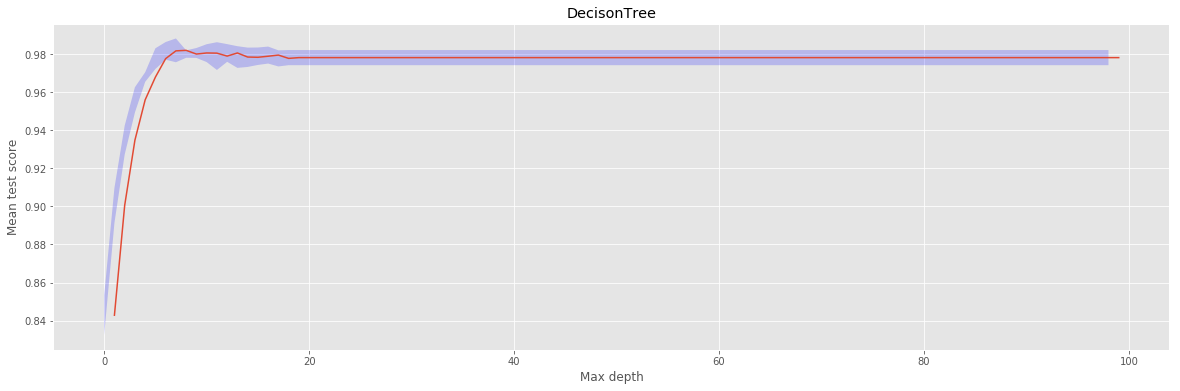

In [181]:
cv = 5
dtc = dtc_(cv, X_train, y_train)
means5, stds5 = prep_visual(dtc)
visual(means5, stds5)

In [182]:
print('train', metrics.f1_score(y_train, dtc.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, dtc.predict(X_test), average='macro'))

train 0.9806362460955393
test 0.9715790356058134


In [183]:
y_train_predict = dtc.predict(X_train)
y_test_predict = dtc.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.01928374655647383 0.028281096963761018


---

In [156]:
from sklearn import linear_model

In [157]:
def prep_visual(grid):
    grid = pd.DataFrame(grid.cv_results_)
    means = grid['mean_test_score']
    stds = grid['std_test_score']
    params = grid['param_loss']
    return means, stds, params

def sgdc_(cv):
    p = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
    neigh = linear_model.SGDClassifier(random_state=6345)
    grid = GridSearchCV(neigh, p, cv=cv, scoring='roc_auc')
    grid.fit(X_train, y_train)
    return grid

def sgdc_visual(means, stds, params):
    plt.figure(figsize=(20, 6))
    plt.style.use('ggplot')
    plt.scatter(params, means)
    plt.fill_between(range(len(means)), means + stds, means-stds, alpha=0.2, facecolor='blue')
    plt.xlabel('Loss')
    plt.ylabel('Mean test score')
    plt.title('SGDC')
    plt.show()



In [159]:
y = df['Author']
y_real = pd.factorize(y)[0]
y_real

array([0, 0, 0, ..., 1, 1, 1])

In [160]:
X_train, X_test, y_train, y_test = train(X, y_real, test_size=0.6, random_state = 11)

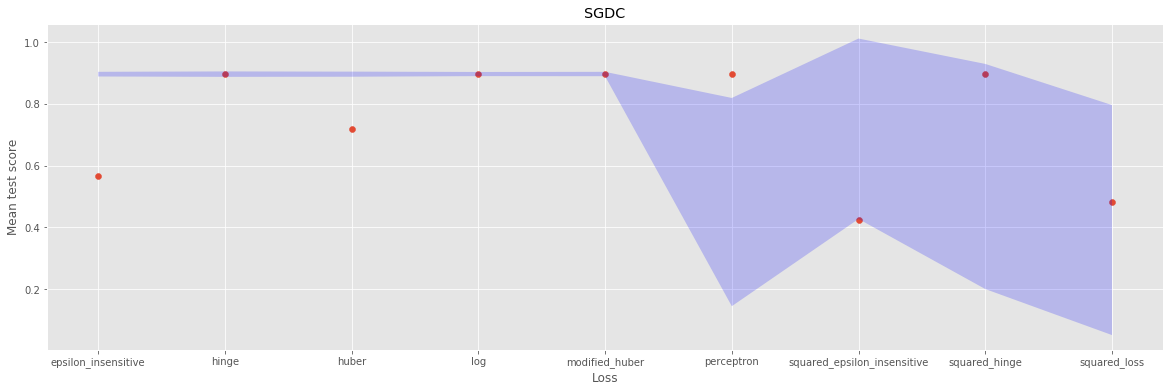

In [163]:
cv = 5
sgdc = sgdc_(cv)
means5, stds5, params = prep_visual(sgdc)
sgdc_visual(means5, stds5, params)

In [164]:
print('train', metrics.f1_score(y_train, sgdc.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, sgdc.predict(X_test), average='macro'))

train 0.7398215962441314
test 0.7440608784127496


In [165]:
y_train_predict = sgdc.predict(X_train)
y_test_predict = sgdc.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.25234159779614324 0.2491429970617042


---

SVC – машина опорных векторов

In [166]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [167]:
print('train', metrics.f1_score(y_train, svc.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, svc.predict(X_test), average='macro'))

train 0.9560137939076626
test 0.9410970281871418


In [168]:
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.04389348025711662 0.058765915768854066


Радиальное ядро

Вначале попробуем найти лучшие значения параметров для радиального ядра.

In [203]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

/Users/alinashaymardanova/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CV error    =  0.020385674931129527
best C      =  100.0
best gamma  =  1.0


In [205]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.0 0.02056807051909892


Линейное ядро

In [207]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)

CV error    =  0.114416896235078
best C      =  10.0


In [208]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.01781450872359963 0.04138099902056807


Полиномиальное ядро

In [ ]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)
print('best degree = ', grid.best_estimator_.degree)

/Users/alinashaymardanova/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

---

GBT – градиентный бустинг деревьев решений

In [171]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

print('train', metrics.f1_score(y_train, svc.predict(X_train), average='macro'))
print('test', metrics.f1_score(y_test, svc.predict(X_test), average='macro'))
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print(err_train, err_test)

train 0.9560137939076626
test 0.9410970281871418
0.0216712580348944 0.0319539666993144
